In [0]:
import tensorflow as tf

In [2]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 54.4MB/s 
     |████████████████████████████████| 3.8MB 51.5MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [0]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [14]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((404, 13), (404,), (102, 13), (102,))

In [16]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [17]:
train_labels[0]

15.2

# Preparing the Data

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [19]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

# Bulid model

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [23]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Error

In [24]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print("All fold validation errors: ",all_scores)
print("Mean of all fold validation error: ",np.mean(all_scores))
print("Average mean histories: ",average_mae_history)

All fold validation errors:  [1.9692522, 2.5227847, 2.6583827, 2.5552323]
Mean of all fold validation error:  2.4264128
Average mean histories:  [10.950831, 3.6687303, 3.0041099, 2.7515223, 2.6050272, 2.4713607, 2.4019058, 2.3455393, 2.2866158, 2.2508092, 2.2145994, 2.1666932, 2.1361594, 2.1334977, 2.0728934, 2.0484076, 2.07173, 2.0420358, 2.0288568, 1.973715, 2.017921, 1.9261446, 1.9157066, 1.9293021, 1.9195857, 1.8928689, 1.8860763, 1.8608962, 1.8325881, 1.8001564, 1.8129573, 1.803025, 1.7789571, 1.7969851, 1.7677654, 1.7542481, 1.7421873, 1.7390844, 1.7287577, 1.7336318, 1.709049, 1.711674, 1.6675584, 1.6687205, 1.6499462, 1.6599956, 1.6383739, 1.6137692, 1.6297826, 1.625421, 1.6235878, 1.605064, 1.5981263, 1.5896451, 1.5684258, 1.5702493, 1.543594, 1.5333118, 1.55428, 1.5001167, 1.5327303, 1.5405366, 1.5287777, 1.5014936, 1.4988614, 1.5080547, 1.4822274, 1.4914724, 1.4544818, 1.4576876, 1.4397372, 1.4596055, 1.4497236, 1.4252036, 1.4239224, 1.4225246, 1.4144359, 1.3958434, 1.430054

# Plotting Error

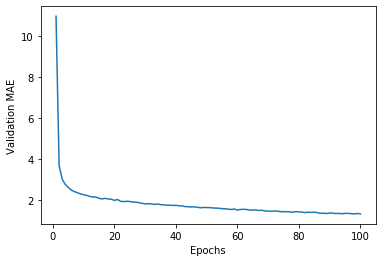

In [25]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

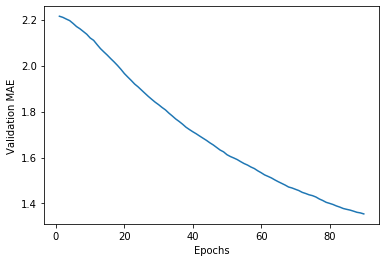

In [26]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Training and Validating Final model

In [27]:
model = build_model()
model.fit(train_data, train_labels, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(test_mae_score)

102/102 [==============================] - 0s 590us/sample - loss: 17.7631 - mae: 2.6889
2.688866
